### Main file

In [1]:
import numpy as np 
from mnist_tryouts.tools.srbm_mnist import *           
from scripts.tools.functions import *
import matplotlib.pyplot as plt

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

In [ ]:
neuron_group_rhidden.age

<neurongroup_1.age: array([ 0.66209316, -0.76861204, -0.90807399,  0.00853649, -0.19027953,
        0.13312919, -0.32883561,  0.83027323, -0.98897728, -0.86789293,
       -0.1872017 , -0.37543444,  0.26612636,  0.55231417,  0.84436178,
        0.42584282, -0.24825234,  0.60115819,  0.990486  ,  0.14849991,
       -0.43930349,  0.54274756,  0.07950208,  0.63022412, -0.44340055,
        0.30383144,  0.86131153, -0.70740405,  0.28663289,  0.97549958,
        0.79987934, -0.57481455, -0.51939563, -0.72079502,  0.83900682,
       -0.97591051,  0.44231779,  0.98716063,  0.43226306, -0.33818607,
        0.65729173, -0.64537413,  0.21768616, -0.47450058, -0.169261  ,
       -0.2688612 , -0.96339675, -0.09434494,  0.76848236, -0.70211052,
       -0.51998155,  0.00361572,  0.23226241, -0.16003248,  0.09666606,
        0.31594305,  0.83209546,  0.23628381,  0.83392892, -0.19630356,
       -0.91288772, -0.71814214, -0.04469889, -0.28426516, -0.0517183 ,
       -0.40580626,  0.03726191, -0.58343922

In [2]:
# A smaller version of the MNIST dataset is used with 5000 training samples and 1000 test samples
# The data tuple contains an input vector sequence for the data and the labels with its size depending on the training duration as well as the original train and test data sets. 
# The input vector sequence is a sequence of data selected to have an equal amount of each class. 

Id = create_Id(N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta = beta_parameter, n_samples=n_samples)
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)
mnist_data = load_mnist_data(n_samples = n_samples, min_p = .00001, max_p = .98, binary = True, seed=0)

In [16]:
# heun method takes 30s for t_sim = dcmt*t_ref*100 
# euler takes less time
loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=mnist_data) # changed from create_Id to Id

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


KeyboardInterrupt: 

In [4]:
locals().update(loc)

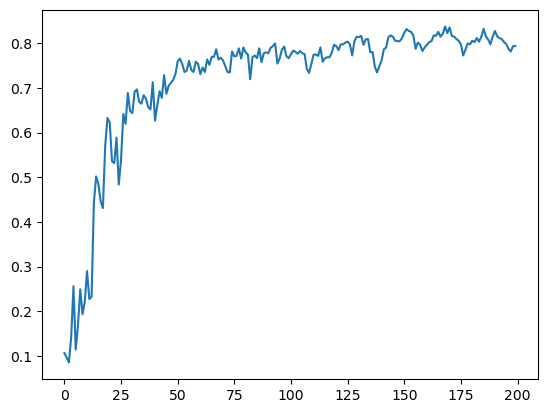

In [7]:
plot(res_hist_test)
plt.show()

In [8]:
# Why does beta get replaced by the numpy function??
W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

In [9]:
path = "output_mnist/"
save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str, path = path)

Matrices saved to output/output/2023-04-18/16-31
